In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [15]:
comments_data = pd.read_csv("UScomments.csv",error_bad_lines=False)

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5



In [16]:
#Retrieving the dimensionality of the data frame
rows = comments_data.shape[0]
columns = comments_data.shape[1]
print(f"There are {rows} rows and {columns} columns in the given dataset")

There are 691400 rows and 4 columns in the given dataset


In [17]:
#To get the top 5 records of the dataset
comments_data.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [18]:
#To get the bottom 5 records of the dataset
comments_data.tail(5)

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [19]:
#To get the random 5 records of the dataset
comments_data.sample(5)

,video_id,comment_text,likes,replies
43325,TngCi2s5rmk,I can beat that 5:31 mins\n\n\n\n\nwith eating...,0,0
468076,A2cRZL70C0w,Am i the only one that sees Gal reading her li...,1,0
233742,k8T9SMqAqyc,nice love this,0,0
47408,zAtHxJvSczA,Can't believe my video 10 Kittens 1st Day Outs...,0,2
408279,ASRxQ6uiVuo,OMG!!!!!,0,0


In [20]:
comments_data.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [22]:
#To get and print the column header and the data type stored in each column
comments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [23]:
comments_data.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [24]:
#To check for the presence of duplicated entries in the dataset
print(comments_data.duplicated().sum())

212693


In [25]:
#To Drop the null values
comments_data=comments_data.dropna()

In [26]:
comments_data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [27]:
#To drop the duplicated values
comments_data=comments_data.drop_duplicates()

In [28]:
print(comments_data.duplicated().sum())

0


In [29]:
comments_data["comment_text"] = comments_data["comment_text"].str.lower()
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,say hi to kong and maverick for me,3,0
3,XpVt6Z1Gjjo,my fan . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
#To remove stop words
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
  #Join all the words into one string if the words are not part of the defines stopwords.
  return " ".join([word for word in str(text).split() if word not in stopwords])
#applying anonymous functions to remove stopwords for each and every row
comments_data["comment_text"] = comments_data["comment_text"].apply(lambda text: remove_stopwords(text))
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've following start vine channel seen 365 vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [34]:
#to remove numbers
def remove_num(text):
  #Join the words into a string if they are not a digit
  return ''.join(filter(lambda x: not x.isdigit(),text))
#applying anonymous functions to remove numbers for each and every row
comments_data["comment_text"] = comments_data["comment_text"].apply(lambda text: remove_num(text))
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've following start vine channel seen vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [40]:
#Lemmetisation
lemmatizer = WordNetLemmatizer()
#Set is created where parts of speech tag is the key whose values are mapped with the value from wordnet dictionary
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
  #assigning some specific token (parts pf speech) to each word.
  pos_tagged_text = nltk.pos_tag(text.split())
  #returning string lemmetising
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
# applying Anonymous functions to lemmetise for each and every row
comments_data["comment_text"] = comments_data["comment_text"] .apply(lambda text: lemmatize_words(text))
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan . attendance,3,0
4,XpVt6Z1Gjjo,trend 😉,3,0


In [41]:
#split the sentence into list and then count each of its occurance
frequency_of_words = pd.Series(' '.join(comments_data["comment_text"]).split()).value_counts()[:10]
frequency_of_words

like     47177
love     44193
get      34956
make     30866
look     23965
video    23574
go       22951
one      21726
i'm      20755
see      18977
dtype: int64

In [42]:
text = " ".join(review for review in comments_data.comment_text)
print("There are {} words in the combination of all review.".format(len(text)))

There are 27100115 words in the combination of all review.


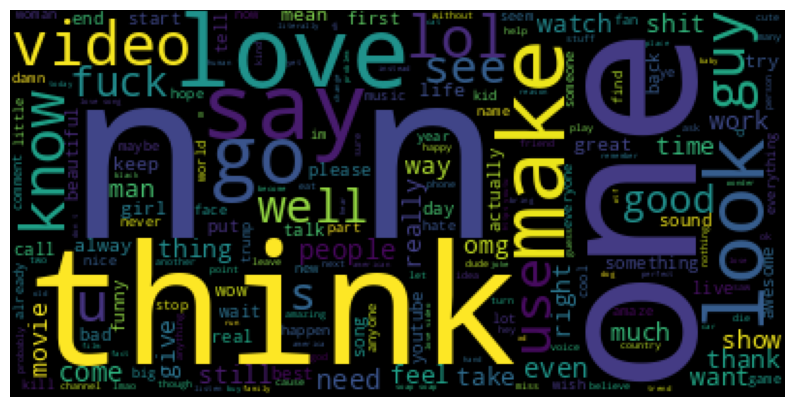

In [43]:
#generate word cloud image
wordcloud = WordCloud(background_color="black").generate(text)

#Displaying the image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [44]:
#Sentiment Analysis

In [45]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyser = SentimentIntensityAnalyzer()

In [47]:
#Calculating sentiment scores
comments_data['Sentiment_Score'] = comments_data['comment_text'].apply(lambda comment_text: sentiment_analyser.polarity_scores(comment_text))
comments_data.head()

,video_id,comment_text,likes,replies,Sentiment_Score
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,XpVt6Z1Gjjo,say hi kong maverick,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,XpVt6Z1Gjjo,fan . attendance,3,0,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp..."
4,XpVt6Z1Gjjo,trend 😉,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [49]:
comments_data['Compound_Sentiment_Score'] = comments_data['Sentiment_Score'].apply(lambda score_dict: score_dict['compound'])
comments_data.head()

,video_id,comment_text,likes,replies,Sentiment_Score,Compound_Sentiment_Score
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,XpVt6Z1Gjjo,say hi kong maverick,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,XpVt6Z1Gjjo,fan . attendance,3,0,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.3182
4,XpVt6Z1Gjjo,trend 😉,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [50]:
#If compound score is >0 then the comment is positive, else if compund score is <0 then the comment is negative, else it ia a neutral comment
comments_data['Sentiment_Type']=''
comments_data.loc[comments_data.Compound_Sentiment_Score>0,'Sentiment_Type']='Positive'
comments_data.loc[comments_data.Compound_Sentiment_Score==0,'Sentiment_Type']='Neutral'
comments_data.loc[comments_data.Compound_Sentiment_Score<0,'Sentiment_Type']='Negative'

In [51]:
comments_data.head()

,video_id,comment_text,likes,replies,Sentiment_Score,Compound_Sentiment_Score,Sentiment_Type
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,XpVt6Z1Gjjo,say hi kong maverick,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,XpVt6Z1Gjjo,fan . attendance,3,0,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.3182,Positive
4,XpVt6Z1Gjjo,trend 😉,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


<Axes: title={'center': 'sentiment analysis'}>

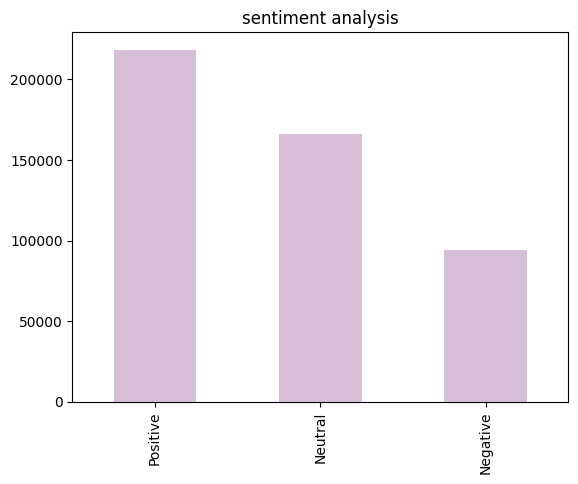

In [52]:
comments_data.Sentiment_Type.value_counts().plot(kind='bar',title="sentiment analysis",color='thistle')

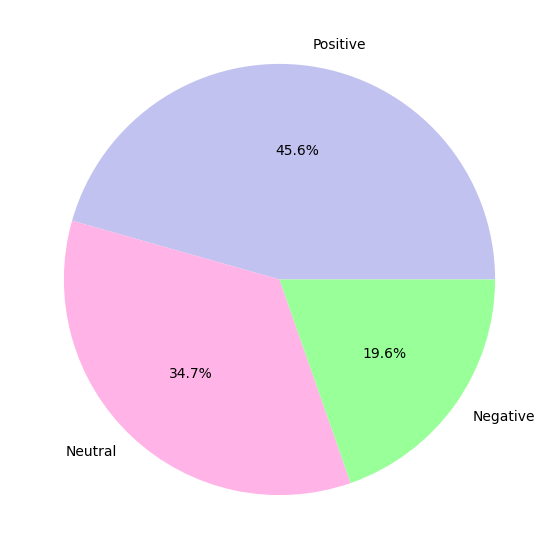

In [53]:
plt.figure(figsize=(10,7))
colors = ['#c2c2f0','#ffb3e6','#99ff99', '#66b3ff' ]
plt.pie(x=comments_data['Sentiment_Type'].value_counts().values,colors=colors,
        labels=comments_data['Sentiment_Type'].value_counts().index,
        autopct='%2.1f%%')

plt.show()

In [54]:
#Wordcloud - To visualise most frequent terms among all positive comments
positive_sentiment = comments_data[comments_data['Sentiment_Type']=='Positive']
text = positive_sentiment.comment_text.values

In [55]:
wordcloud_for_positive_sentiment=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

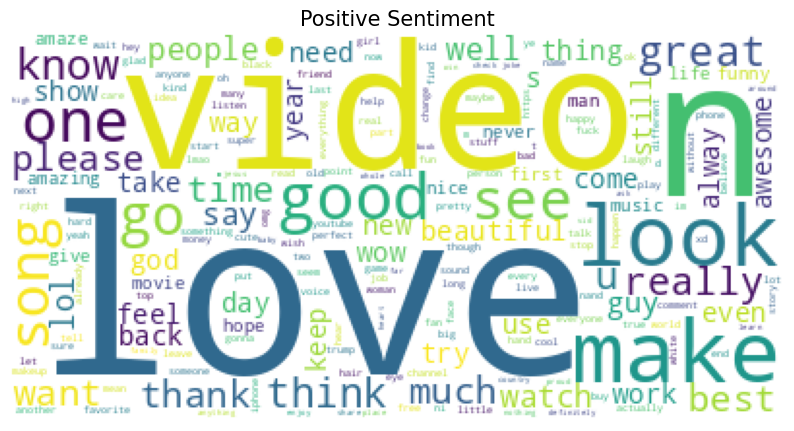

In [56]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Positive Sentiment",fontsize=15)
plt.imshow(wordcloud_for_positive_sentiment)

In [57]:
#Wordcloud - To visualise most frequent terms among all negative comments
negative_sentiment = comments_data[comments_data['Sentiment_Type']=='Negative']
text = negative_sentiment.comment_text.values

In [58]:
wordcloud_for_negative_sentiment=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

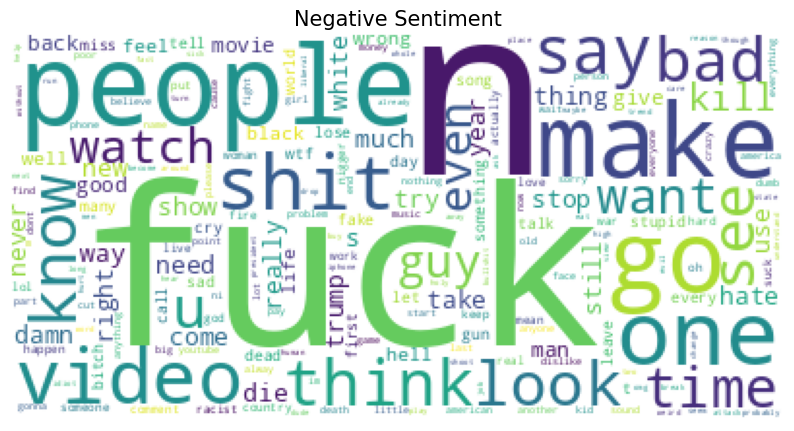

In [59]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Negative Sentiment",fontsize=15)
plt.imshow(wordcloud_for_negative_sentiment)

In [60]:
#Wordcloud - To visualise most frequent terms among all neutral comments
neutral_sentiment = comments_data[comments_data['Sentiment_Type']=='Neutral']
text = neutral_sentiment.comment_text.values

In [61]:
wordcloud_for_neutral_sentiment=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

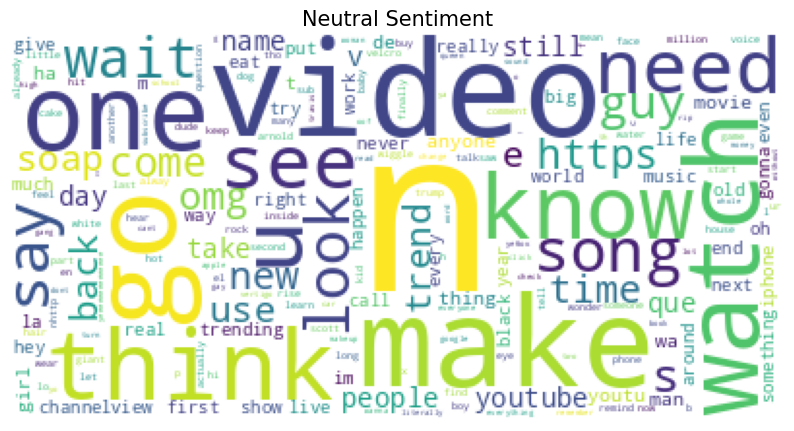

In [62]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Neutral Sentiment",fontsize=15)
plt.imshow(wordcloud_for_neutral_sentiment)